In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
None             0
dtype: int64

In [9]:
all_labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

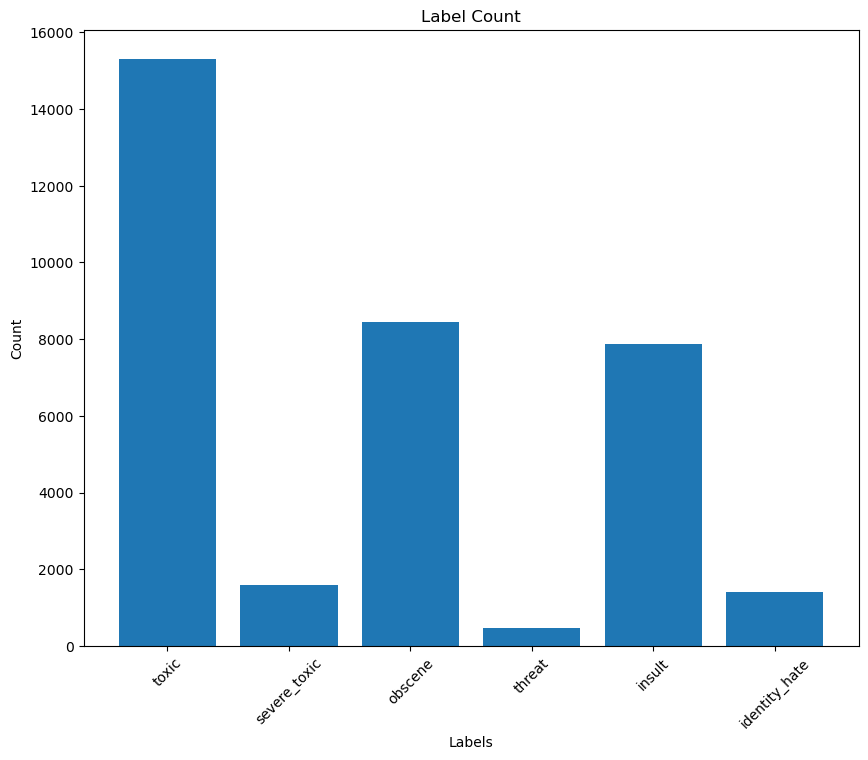

In [13]:
# Sum each label across all rows to get the count for each label
label_counts = df_train[all_labels].sum()

plt.figure(figsize=(10,8))
plt.bar(x=all_labels, height=label_counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Label Count')
plt.xticks(rotation=45)
plt.show()


In [18]:
df_train[(df_train['toxic']!=1) & ((df_train['severe_toxic']==1)|(df_train['obscene']==1) | (df_train['threat']==1) | (df_train['insult']==1) | (df_train['identity_hate']==1) )]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
179,006d11791d76b9f3,"REPLY ABOVE:\nThat was me, loser. The UN defin...",0,0,0,0,1,0
527,01625cc84c6ef15b,How do you know he is dead. Its just his plan...,0,0,1,0,0,0
662,01ccf4d20d31dfbe,Hebrew Name of Lydia \nAppologies to Til Eulen...,0,0,0,0,1,0
1232,0350c82d1f207e0e,Bleh. I'm all out of ideas. Is there really so...,0,0,1,0,0,0
1351,03aec26f9b6f9ba3,"""\n\n Stop. \n\nStop redirecting the Teddygodz...",0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
158615,f0b46600c7cf2515,"""""""And at least Castro was trying to liberate ...",0,0,1,0,1,0
158793,f3d62179cdb93e58,"Hey FayssalFag, will you ever get a life offli...",0,0,1,0,1,0
158933,f60a9bd97d717630,Administratore: I need your help to stop DIREK...,0,0,0,0,1,0
159103,f896893958bb1cec,"OH DEAR OH DEAR, HOW FUKIN SAD. I WILL REGRET ...",0,0,1,0,0,0


In [19]:
# Here I can see that the the comments that are not clssified as toxic are classified as obscene, threadtm insult and identity hate

In [24]:
df_train[(df_train['toxic']!=1) & (df_train['severe_toxic']==1)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [28]:
# Also toxic comment are severe_toxic. So I'll be dropping this column

In [30]:
df_train[(df_train['toxic']==1) | (df_train['severe_toxic']==1)|(df_train['obscene']==1) | (df_train['threat']==1) | (df_train['insult']==1) | (df_train['identity_hate']==1) ]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [31]:
df_train[(df_train['toxic']!=1) & (df_train['threat']==1)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
3712,09eb7d87b8c24ca5,Please stop. If you continue to ignore our pol...,0,0,0,1,0,0
6316,10dcd8f485bd06f4,"""\n\n Lock Down \n\nI don't know about the """"B...",0,0,1,1,0,0
16939,2cb0ead532923065,That's funny. You was personally offended? So ...,0,0,0,1,0,0
17210,2d6e671ffae726a3,Wow dude. As your physician I suggest you sli...,0,0,0,1,0,0
23374,3dbae03a5f33e414,hey!!!!!!! thank you for re-editing my contrib...,0,0,0,1,1,0
29295,4db479fe05e88395,Regarding your passing \n\nBecause you willful...,0,0,0,1,0,0
48209,80e0b91bdea43fd3,personal attacks \n\ndont tell me what i can a...,0,0,0,1,0,0
51307,8947f2c12aea0a32,"If no-one beats me to it, I'll knock something...",0,0,0,1,0,0
53841,8fd45641216fdfde,Wikistalking \n\nUnless you wish to be targete...,0,0,0,1,0,0
56561,971494c52942a6cc,"Our warning to you ,Weare not afraid of you b...",0,0,0,1,0,0


In [96]:
df_train['None']=0

In [97]:
# Corrected assignment
df_train.loc[(df_train['toxic'] == 0) & 
             (df_train['severe_toxic'] == 0) & 
             (df_train['obscene'] == 0) & 
             (df_train['threat'] == 0) & 
             (df_train['insult'] == 0) & 
             (df_train['identity_hate'] == 0), 'None'] = 1

In [98]:
df_train[df_train['None']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,None
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [99]:
all_labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate','None']

In [127]:
label_counts = df_train[all_labels].sum()
label_counts

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
None             143346
dtype: int64

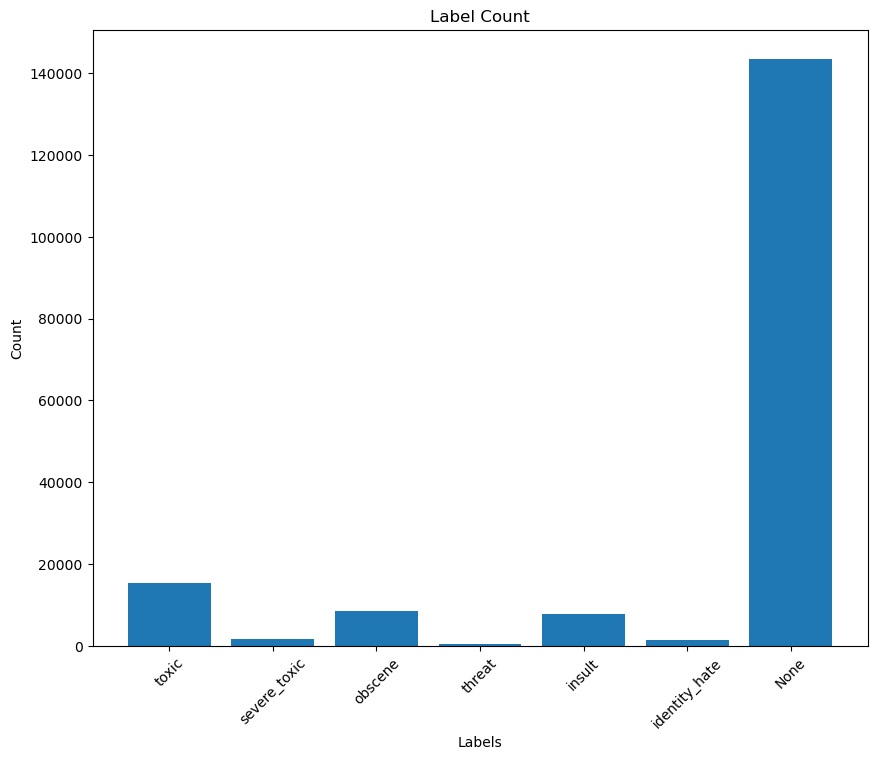

In [100]:
# Sum each label across all rows to get the count for each label


plt.figure(figsize=(10,8))
plt.bar(x=all_labels, height=label_counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Label Count')
plt.xticks(rotation=45)
plt.show()


In [84]:
df_train['comment_text'].count()

159571

In [85]:
text_data=df_train['comment_text']

In [86]:
text_data

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [87]:
comment_length=text_data.apply(len)

In [88]:
comment_length

0         264
1         112
2         233
3         622
4          67
         ... 
159566    295
159567     99
159568     81
159569    116
159570    189
Name: comment_text, Length: 159571, dtype: int64

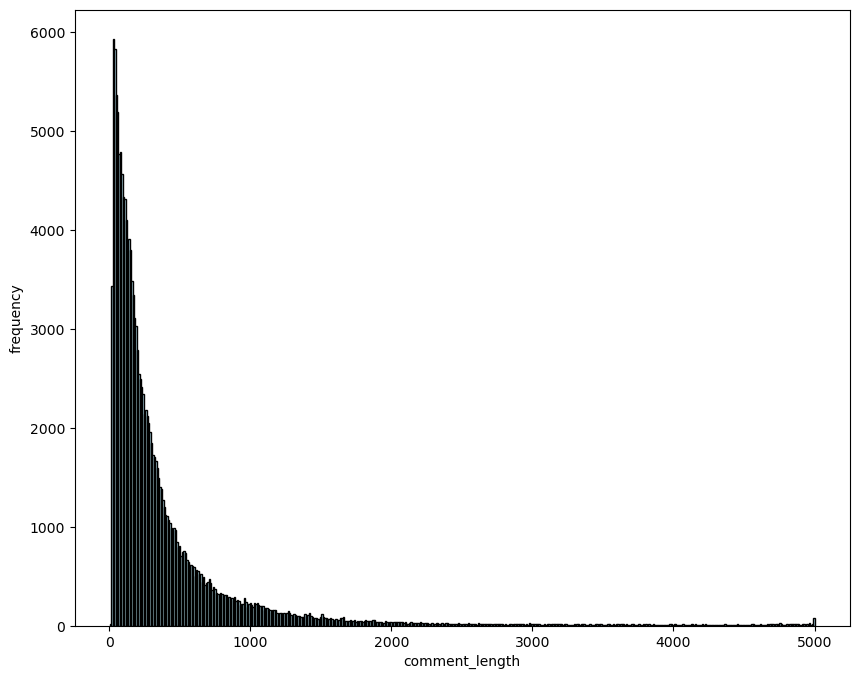

In [89]:
plt.figure(figsize=(10,8))
plt.hist(x=comment_length,bins=500,color='lightblue',edgecolor='black')
plt.xlabel('comment_length')
plt.ylabel('frequency')
plt.show()

In [90]:
# Give an idea that the most comment length is between 0 to 700

In [91]:
# Now seeing heatmap to see how each labels relate to each other.

<Axes: >

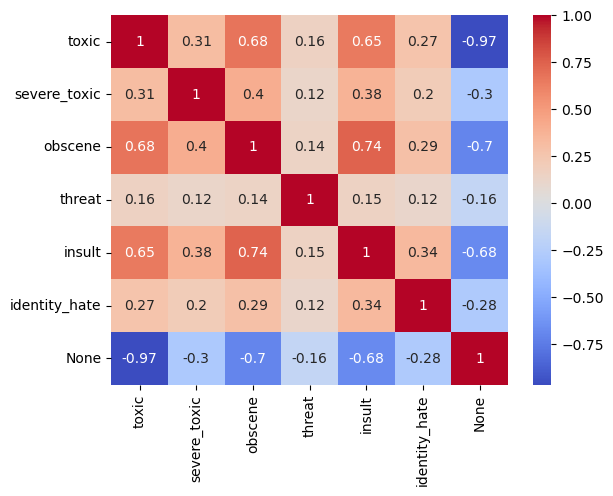

In [101]:
sns.heatmap(data=df_train[all_labels].corr(),cmap='coolwarm',annot=True)

In [120]:
# Setting new tooxicity for the columns to store the data for all type of toxicity
# Corrected assignment
df_train['all_kind_of_toxic_or_not']=0
df_train.loc[df_train['None']==0,'all_kind_of_toxic_or_not']=1

<BarContainer object of 2 artists>

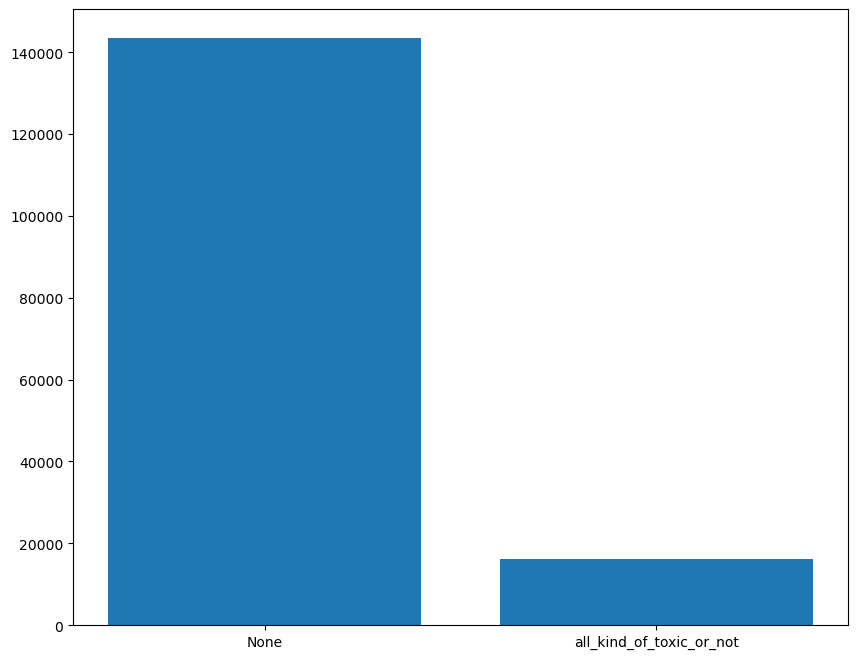

In [128]:
counts = df_train[['None', 'all_kind_of_toxic_or_not']].sum()
plt.figure(figsize=(10,8))
plt.bar(x=counts.index,height=counts)

In [140]:
df_train[df_train['all_kind_of_toxic_or_not']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,None,all_kind_of_toxic_or_not
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0,1
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,0,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,0,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,0,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,0,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,0,1
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,0,1
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,0,1


In [129]:
X=df_train['comment_text']
y=df_train['all_kind_of_toxic_or_not']

In [102]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(row):
    row = row.lower()
    row = re.sub(r'[^\w\s]', '', row)
    words = row.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words) if words else 'empty'

        

In [103]:
def get_features(X_train,train_data=False):
    X=[]
    for row in X_train:
        row=preprocess(row)
        X.append(row)
    if(train_data==True):
        X_tfidf=tfidf.fit_transform(X)
    else:
        X_tfidf=tfidf.transform(X)
    return X_tfidf
    
        

In [104]:
def train_model(X_train,y_train,model):
    X=get_features(X_train,train_data=True)
    model.fit(X,y_train)
    return model

In [153]:
X_train,X_test,y_train,y_pred=train_test_split(X,y,test_size=0.3,train_size=0.7)
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1, 2))
LR_model=LogisticRegression(random_state=42,max_iter=1000,class_weight='balanced',C=2)
model=train_model(X_train,y_train,LR_model)

In [154]:
def model_predict(trained_model,X_test,y_test):
    X=get_features(X_test,train_data=False)
    predictions=trained_model.predict(X)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm=confusion_matrix(y_test,predictions)
    # Print metrics for analysis
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(cm)
    tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
    print(tn, fp, fn, tp)

In [155]:
model_predict(model,X_test,y_pred)

Accuracy: 0.95
Precision: 0.72
Recall: 0.81
F1 Score: 0.76
[[41342  1595]
 [  932  4003]]
41342 1595 932 4003


In [163]:
#X_train,X_test,y_train,y_pred=train_test_split(X,y,test_size=0.3,train_size=0.7)
#tfidf = TfidfVectorizer(stop_words='english')
nb=MultinomialNB()
model=train_model(X_train,y_train,nb)

In [164]:
model_predict(model,X_test,y_pred)

Accuracy: 0.92
Precision: 1.00
Recall: 0.18
F1 Score: 0.31
[[43053     1]
 [ 3930   888]]
43053 1 3930 888
